<a href="https://colab.research.google.com/github/Gamearonx/Python-Basic/blob/main/NUMPY%2C_PANDAS%2C_MATPLOTLIB%2C_AND_SEABORN_tips.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [53]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
df = pd.read_csv("/content/drive/My Drive/PRE BOOT CAMP ASSIGNMENT/tips.csv")

# 1. Inspecting Dataset

In [52]:
# Inspect the dataset
print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset Information:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

First 5 rows of the dataset:
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None

Summary Statistics:
       total_bill         tip        size
count  244.000000  24

# 2. Numpy Operation

In [58]:
# Create NumPy arrays
array_1d = np.array([1, 2, 3, 4, 5])
array_2d = np.array([[1, 2, 3], [4, 5, 6]])
zeros_array = np.zeros((3, 3))
ones_array = np.ones((2, 2))
random_array = np.random.rand(3, 3)

# Perform element-wise operations
sum_array = array_1d + 10  # Add 10 to each element
mult_array = array_1d * 2  # Multiply each element by 2

# Reshape and concatenate arrays
reshaped_array = array_1d.reshape(5, 1)  # Reshaping 1D to 2D
hstack_array = np.hstack((array_2d, np.array([[7], [8]])))  # Horizontal stacking
vstack_array = np.vstack((array_2d, np.array([7, 8, 9])))   # Vertical stacking

# Display outputs
zeros_array, ones_array, random_array, sum_array, mult_array, reshaped_array, hstack_array, vstack_array



(array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 array([[1., 1.],
        [1., 1.]]),
 array([[0.49646064, 0.39015836, 0.92701022],
        [0.87911728, 0.22088965, 0.94720833],
        [0.26112727, 0.0528814 , 0.61996462]]),
 array([11, 12, 13, 14, 15]),
 array([ 2,  4,  6,  8, 10]),
 array([[1],
        [2],
        [3],
        [4],
        [5]]),
 array([[1, 2, 3, 7],
        [4, 5, 6, 8]]),
 array([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]))

# 2. DF Manipulation

In [59]:
# Selecting specific columns
selected_columns = df[['total_bill', 'tip', 'size']]

# Filtering rows (e.g., tips greater than $5)
high_tips = df[df['tip'] > 5]

# Grouping by 'day' and aggregating average total_bill and tip
grouped_data = df.groupby('day')[['total_bill', 'tip']].mean()

# Checking for missing values and handling them (no missing values here, but we'll show the function)
missing_values = df.isnull().sum()

# Display outputs
selected_columns.head(), high_tips.head(), grouped_data, missing_values



(   total_bill   tip  size
 0       16.99  1.01     2
 1       10.34  1.66     3
 2       21.01  3.50     3
 3       23.68  3.31     2
 4       24.59  3.61     4,
     total_bill   tip     sex smoker  day    time  size
 23       39.42  7.58    Male     No  Sat  Dinner     4
 44       30.40  5.60    Male     No  Sun  Dinner     4
 47       32.40  6.00    Male     No  Sun  Dinner     4
 52       34.81  5.20  Female     No  Sun  Dinner     4
 59       48.27  6.73    Male     No  Sat  Dinner     4,
       total_bill       tip
 day                       
 Fri    17.151579  2.734737
 Sat    20.441379  2.993103
 Sun    21.410000  3.255132
 Thur   17.682742  2.771452,
 total_bill    0
 tip           0
 sex           0
 smoker        0
 day           0
 time          0
 size          0
 dtype: int64)

# 3. Data Preprocessing & Transformation

In [60]:
# Normalize numerical columns (Min-Max Scaling)
df['total_bill_norm'] = (df['total_bill'] - df['total_bill'].min()) / (df['total_bill'].max() - df['total_bill'].min())

# Apply log transformation to 'tip' to reduce skewness
df['log_tip'] = np.log(df['tip'] + 1)  # Adding 1 to avoid log(0)

# Convert categorical variables into numerical using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

# Display the first few rows
df_encoded.head()


,total_bill,tip,size,total_bill_norm,log_tip,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,0.291579,0.698135,False,False,False,True,False,False
1,10.34,1.66,3,0.152283,0.978326,True,False,False,True,False,False
2,21.01,3.50,3,0.375786,1.504077,True,False,False,True,False,False
3,23.68,3.31,2,0.431713,1.460938,True,False,False,True,False,False
4,24.59,3.61,4,0.450775,1.528228,False,False,False,True,False,False


# 4: Data Visualization

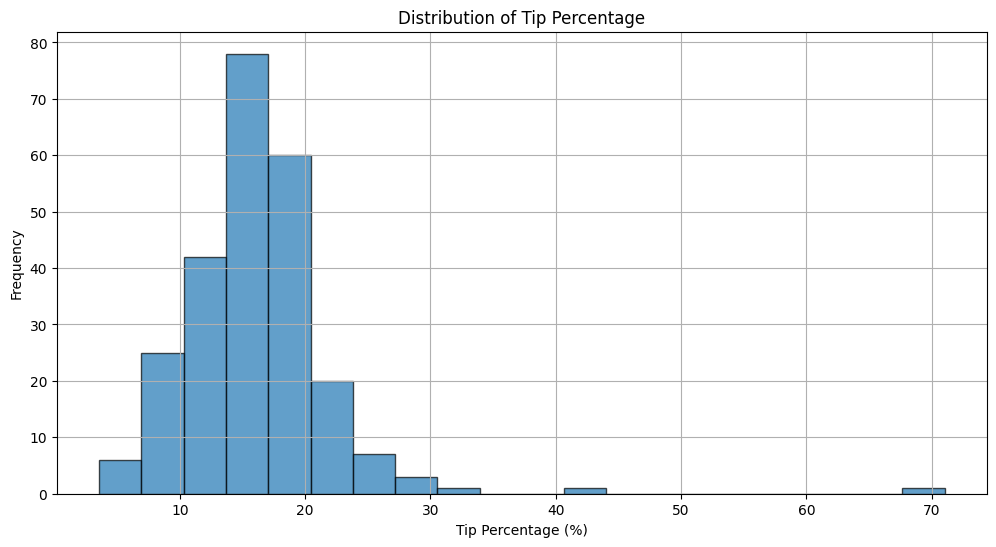

In [61]:

# Calculate Tip Percentage
df['tip_pct'] = (df['tip'] / df['total_bill']) * 100

# Summary statistics of tip percentage
tip_summary = df['tip_pct'].describe()

# Plot Histogram of Tip Percentage
plt.figure(figsize=(12, 6))
plt.hist(df['tip_pct'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel("Tip Percentage (%)")
plt.ylabel("Frequency")
plt.title("Distribution of Tip Percentage")
plt.grid(True)
plt.show()

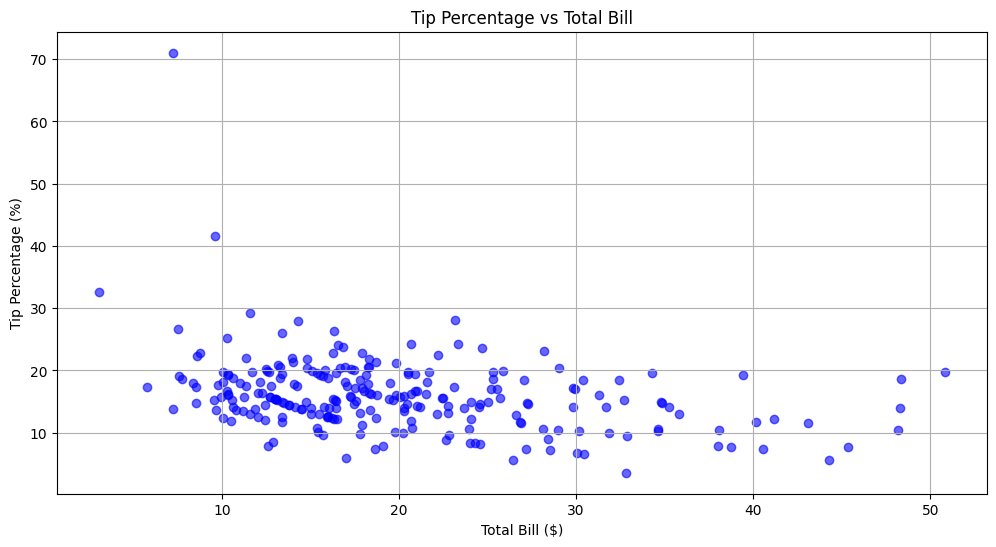

In [62]:
# Scatter Plot of Tip Percentage vs Total Bill
plt.figure(figsize=(12, 6))
plt.scatter(df['total_bill'], df['tip_pct'], alpha=0.6, color='blue')
plt.xlabel("Total Bill ($)")
plt.ylabel("Tip Percentage (%)")
plt.title("Tip Percentage vs Total Bill")
plt.grid(True)
plt.show()

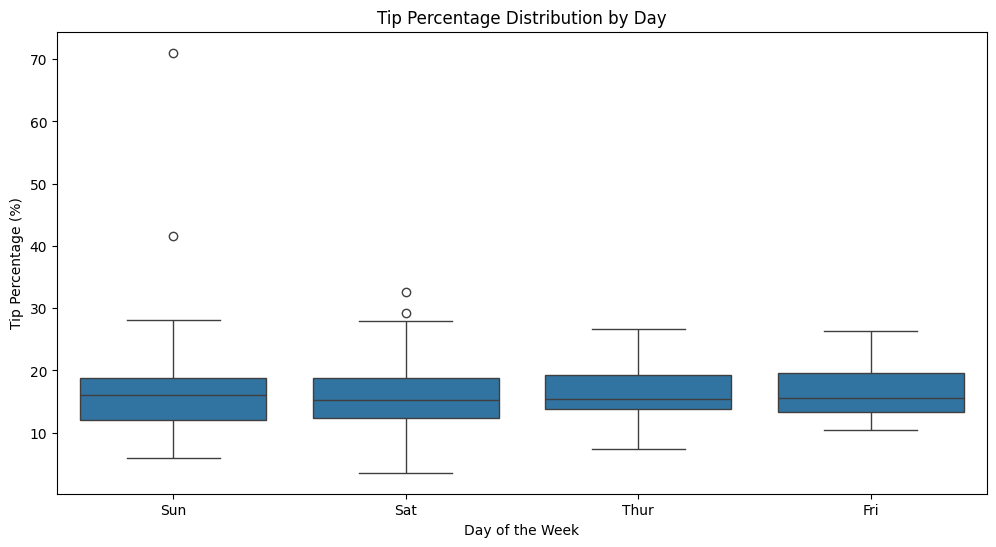

In [63]:
# Box Plot of Tip Percentage by Day
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['day'], y=df['tip_pct'])
plt.xlabel("Day of the Week")
plt.ylabel("Tip Percentage (%)")
plt.title("Tip Percentage Distribution by Day")
plt.show()

In [64]:
# Display summary statistics
tip_summary

,tip_pct
count,244.000000
mean,16.080258
std,6.107220
min,3.563814
25%,12.912736
50%,15.476977
75%,19.147549
max,71.034483


# 5: Fine-tuning and Optimization

In [65]:
# Check memory usage before optimization
memory_before = df_encoded.memory_usage(deep=True).sum()

# Convert data types to optimize memory usage
df_encoded['size'] = df_encoded['size'].astype(np.int8)  # Convert to smaller int type
df_encoded['sex_Male'] = df_encoded['sex_Male'].astype(np.int8)
df_encoded['smoker_Yes'] = df_encoded['smoker_Yes'].astype(np.int8)
df_encoded[['day_Sat', 'day_Sun', 'day_Thur', 'time_Lunch']] = df_encoded[['day_Sat', 'day_Sun', 'day_Thur', 'time_Lunch']].astype(np.int8)

# Check memory usage after optimization
memory_after = df_encoded.memory_usage(deep=True).sum()

memory_before, memory_after


(np.int64(11356), np.int64(9648))